In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
# To display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [4]:
# To obtain basic statistics of the dataset for numerical features
# Here there are 38 features that are quantitative out of which Id and Salesprice should not be considered, because Id represents the row count and sales price in the dependent variable
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ..

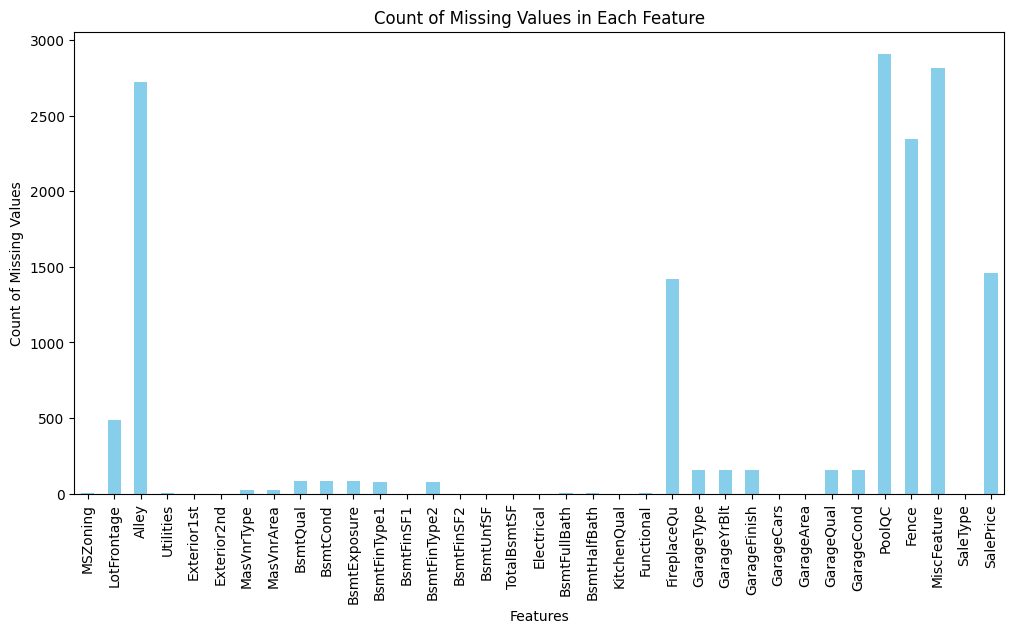

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Check for missing values
missing_values_count = df.isnull().sum()

# Filter features with missing values
features_with_missing = missing_values_count[missing_values_count > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
features_with_missing.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Count of Missing Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')

# Show the plot
plt.show()

In [6]:
print(df.nunique())

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


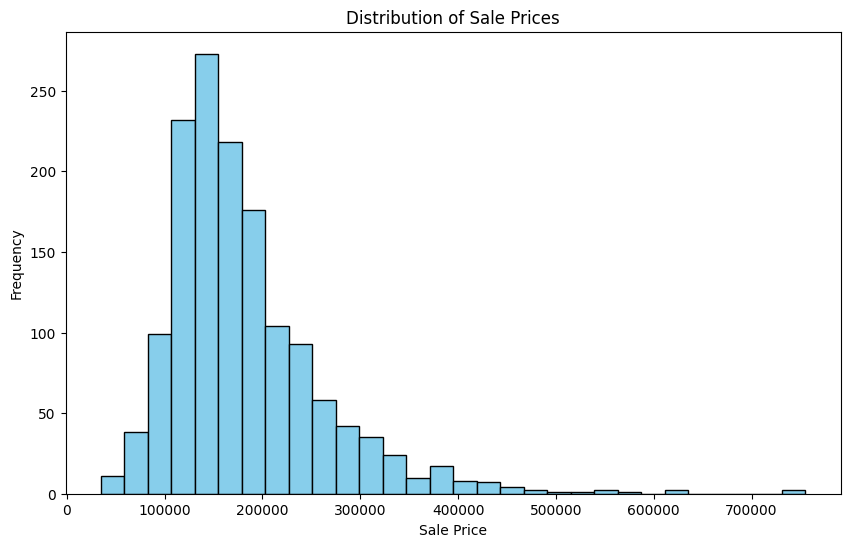

In [7]:
# Histogram for Target Variable (Sale Prices):
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Plot histogram for the target variable (Sale Prices)
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

#Reveals the distribution of sale prices.
#Highlights potential outliers or skewed distributions.

<ipython-input-8-6291ee2a06eb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


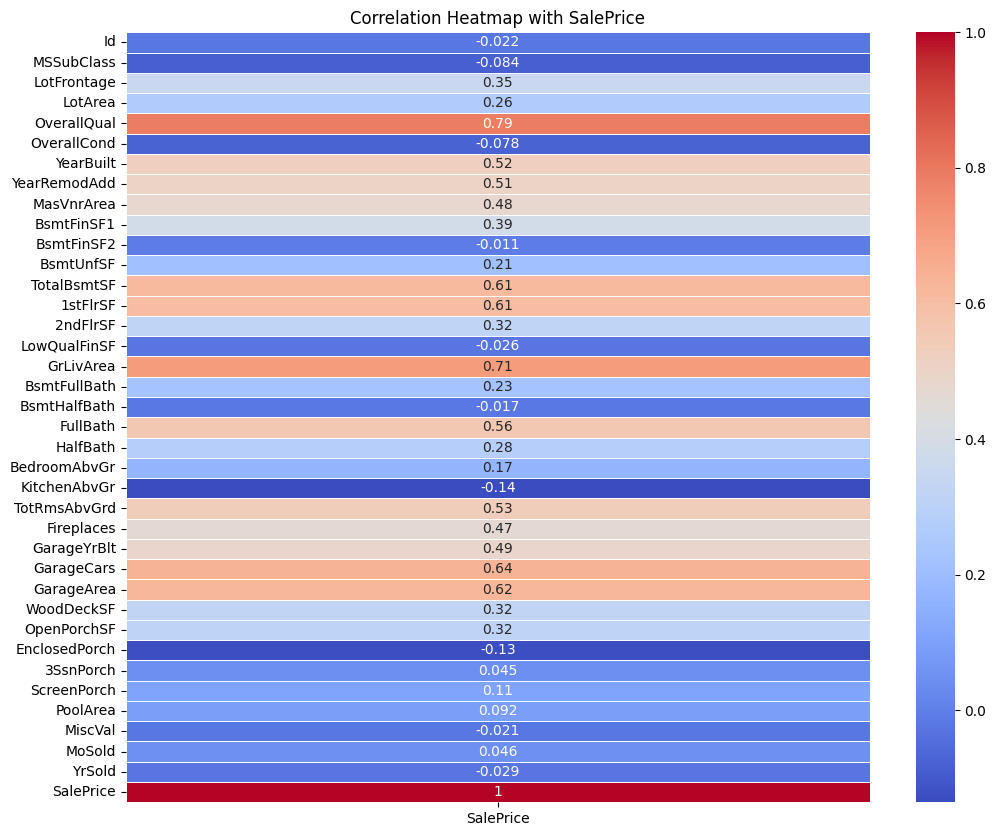

In [8]:
# Correlation Analysis:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap with SalePrice')
plt.show()

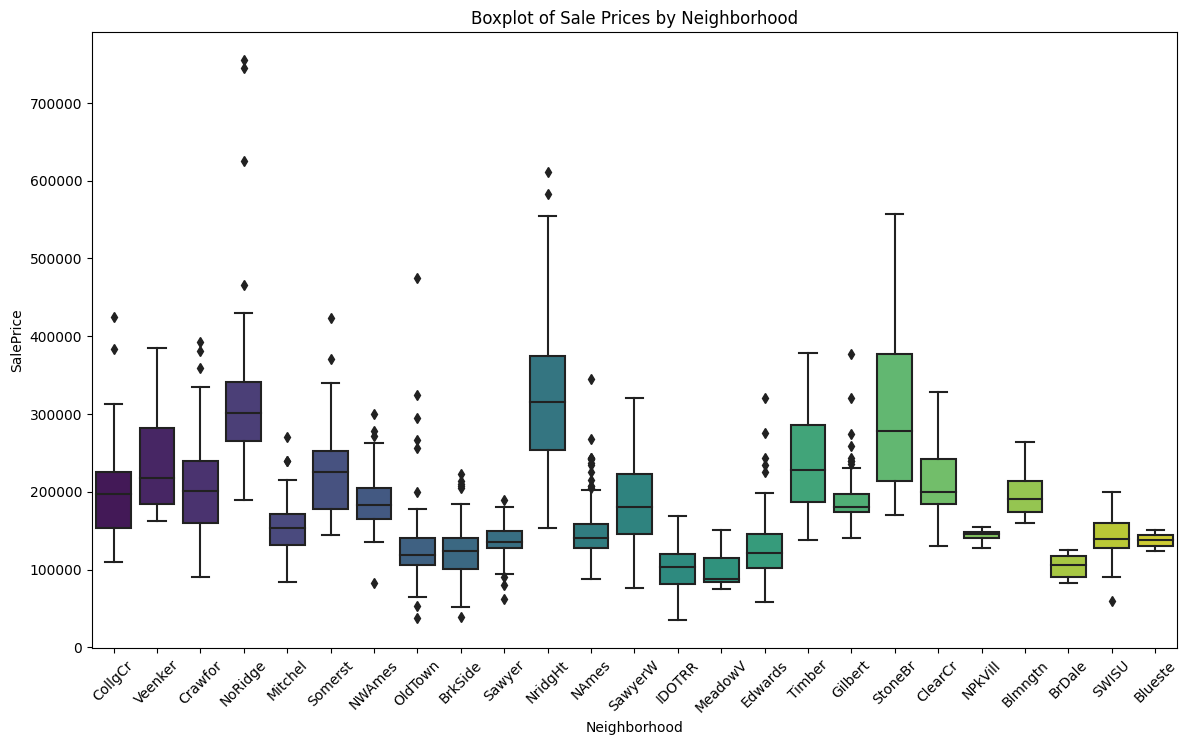

In [9]:
# Boxplot for Categorical Variables:
import seaborn as sns

# Assuming 'data' is your DataFrame and 'categorical_feature' is a categorical column
# Plot boxplot for a categorical variable against the target variable
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='viridis')
plt.title('Boxplot of Sale Prices by Neighborhood')
plt.xticks(rotation=45)
plt.show()

#Displays the spread of sale prices across different categories.
#Identifies potential variations in sale prices based on categorical features.


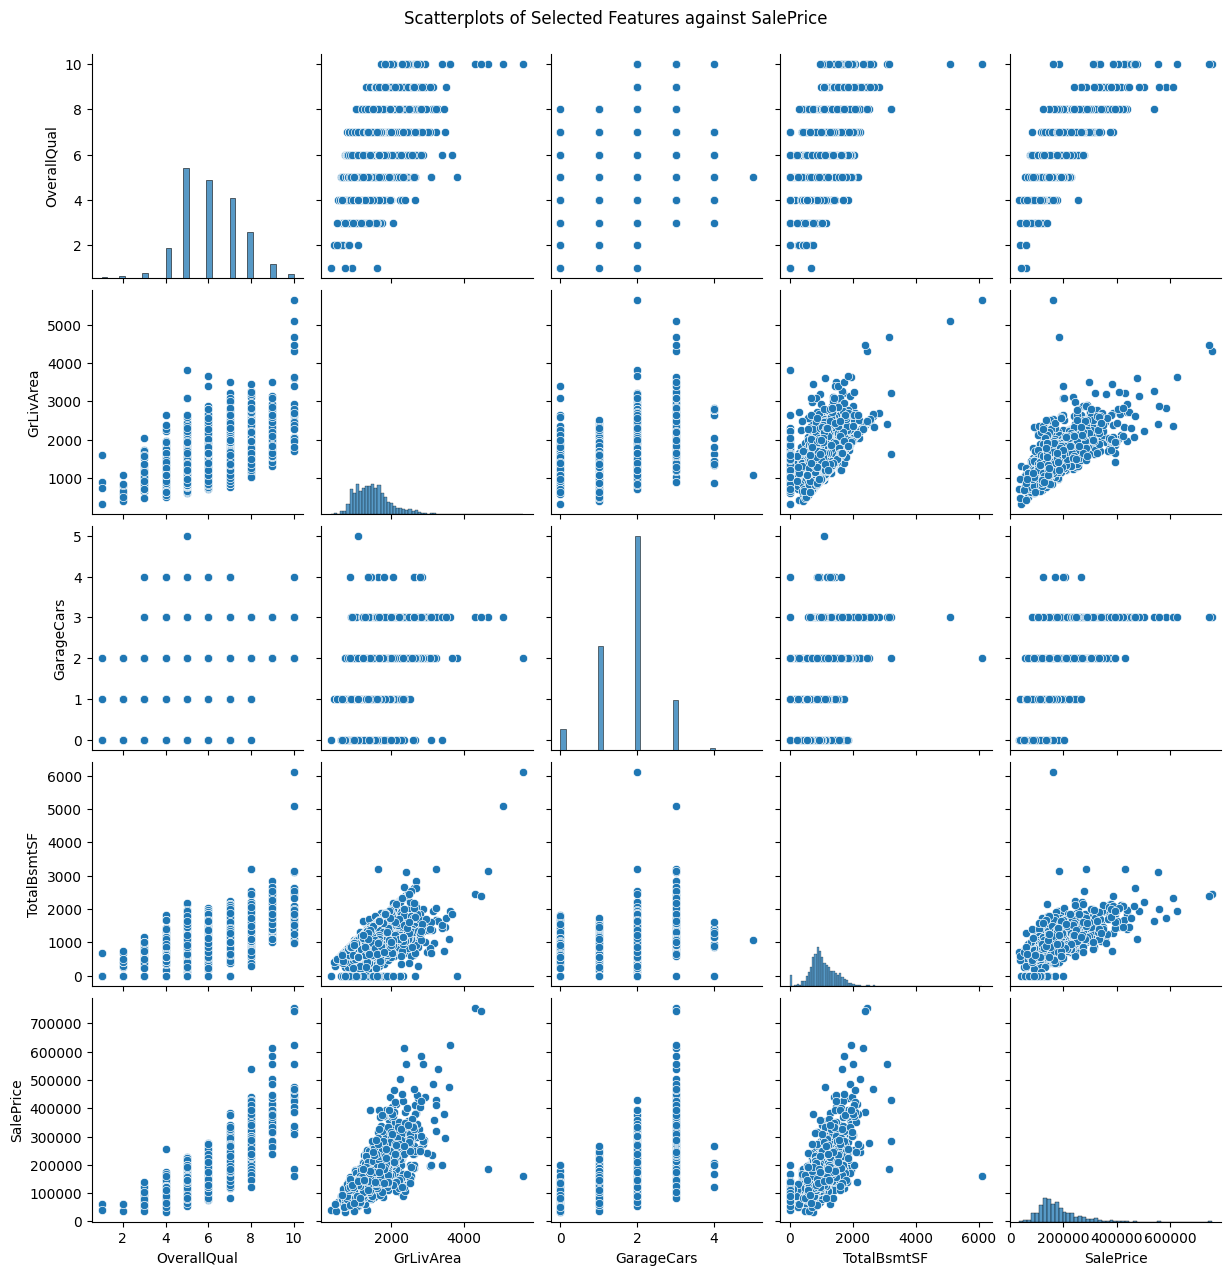

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice']

# Create pair plots for selected features
sns.pairplot(df[selected_features])
plt.suptitle('Scatterplots of Selected Features against SalePrice', y=1.02)
plt.show()


In [11]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

<ipython-input-12-d3897586610a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.johnsonsu)
<ipython-input-12-d3897586610a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.norm)
<ipython-input-12-d3897586610a>:8: UserWarning: 

`distplot` is a dep

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice'>

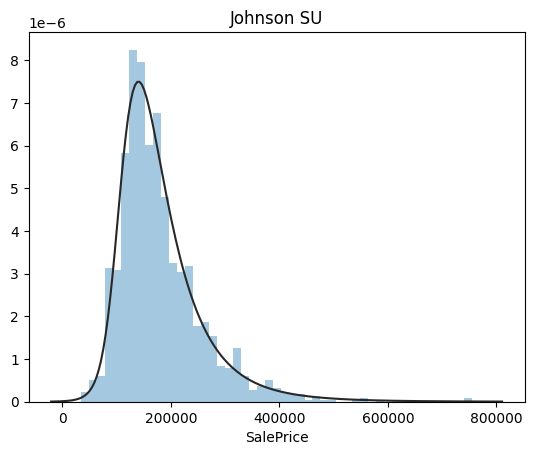

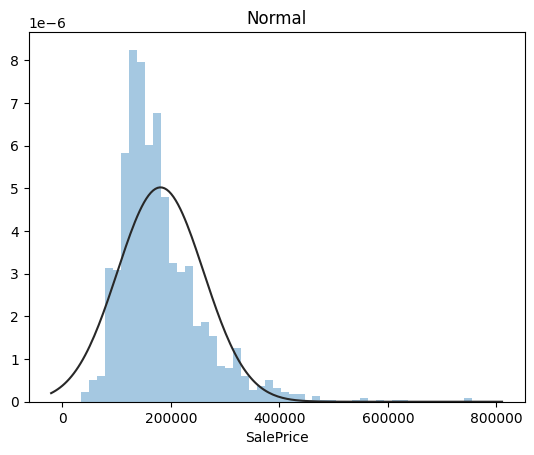

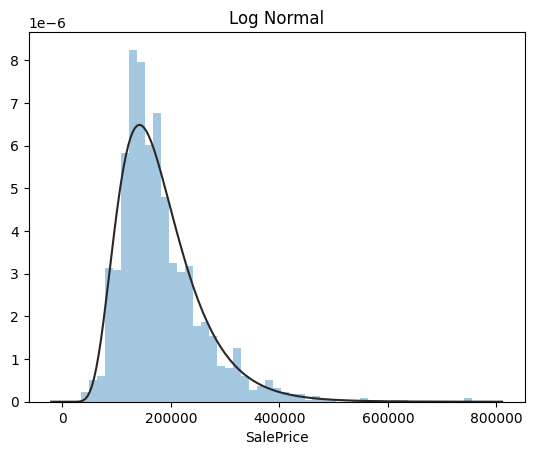

In [12]:
import scipy.stats as stats
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [13]:
# Performing normality test on the quantitative data # False indicates it has failed the Normality test
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [14]:
#skewness and kurtosis
print("Skewness: " + str(df['SalePrice'].skew()))
print("Kurtosis: " + str(df['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.5362818600645305


In [15]:
# Z-Score Method
z_scores = stats.zscore(df['SalePrice'])
outliers = (np.abs(z_scores) > 3)
outlier_values = df['SalePrice'][outliers]

# IQR Method
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df['SalePrice'] < Q1 - 1.5 * IQR) | (df['SalePrice'] > Q3 + 1.5 * IQR))
outlier_values = df['SalePrice'][outliers]

In [16]:
# Z-Score Method
z_scores = stats.zscore(df['GrLivArea'])
outliers = (np.abs(z_scores) > 3)
outlier_values = df['GrLivArea'][outliers]

# IQR Method
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df['GrLivArea'] < Q1 - 1.5 * IQR) | (df['GrLivArea'] > Q3 + 1.5 * IQR))
outlier_values = df['GrLivArea'][outliers]

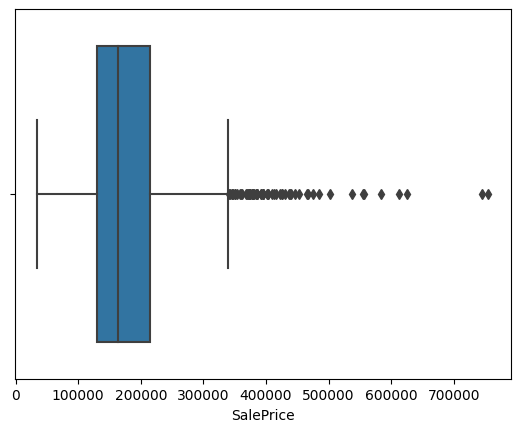

In [17]:
# Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot for 'SalePrice'
sns.boxplot(x=df['SalePrice'])
plt.show()


In [18]:
## Deleting those two values with outliers.
df1 = df[df.GrLivArea < 4500]
df1.reset_index(drop = True, inplace = True)

In [19]:
# Assuming df1 is your DataFrame
df1_shape = df1.shape

# Now you can access the number of rows and columns using the returned tuple
num_rows = df1_shape[0]
num_columns = df1_shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2916
Number of columns: 81


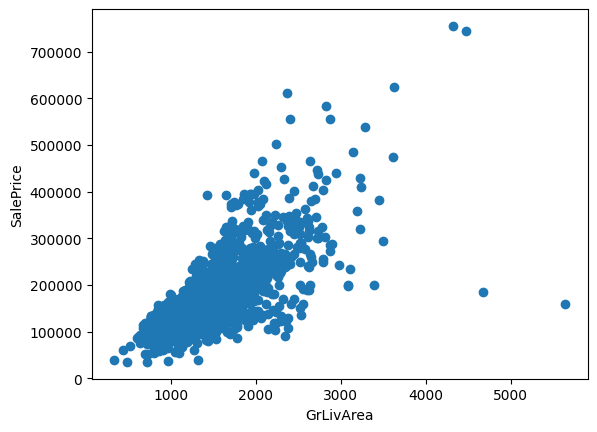

In [20]:
# Example: Scatter plot for 'GrLivArea' vs. 'SalePrice'
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

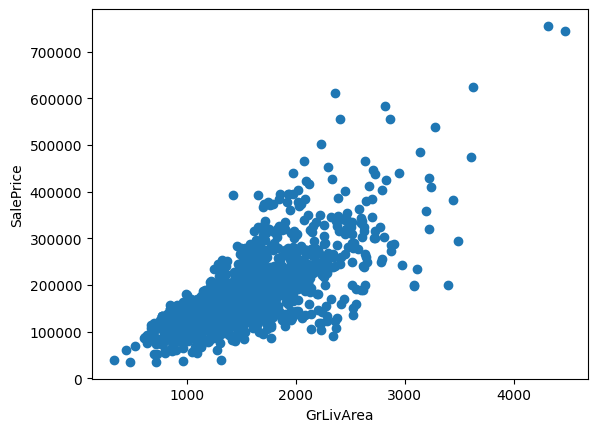

In [21]:
# Example: Scatter plot for 'GrLivArea' vs. 'SalePrice'
plt.scatter(df1['GrLivArea'], df1['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

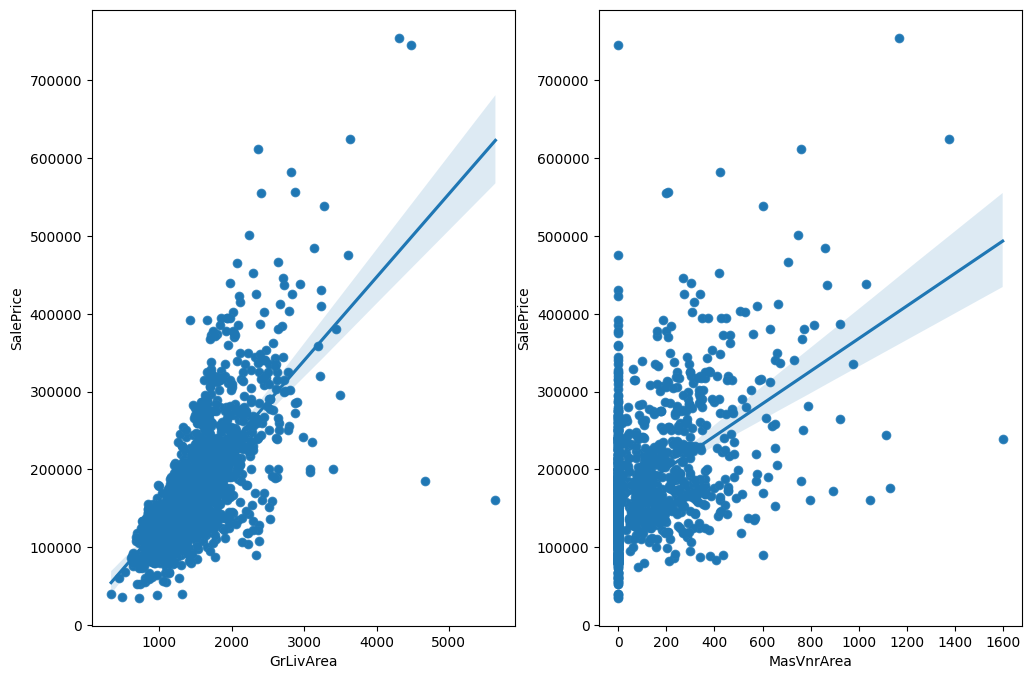

In [22]:
## Plot sizing.
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea.
sns.scatterplot( x = df.GrLivArea, y = df.SalePrice,  ax=ax1)
## Putting a regression line.
sns.regplot(x=df.GrLivArea, y=df.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea.
sns.scatterplot(x = df.MasVnrArea,y = df.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice.
sns.regplot(x=df.MasVnrArea, y=df.SalePrice, ax=ax2);

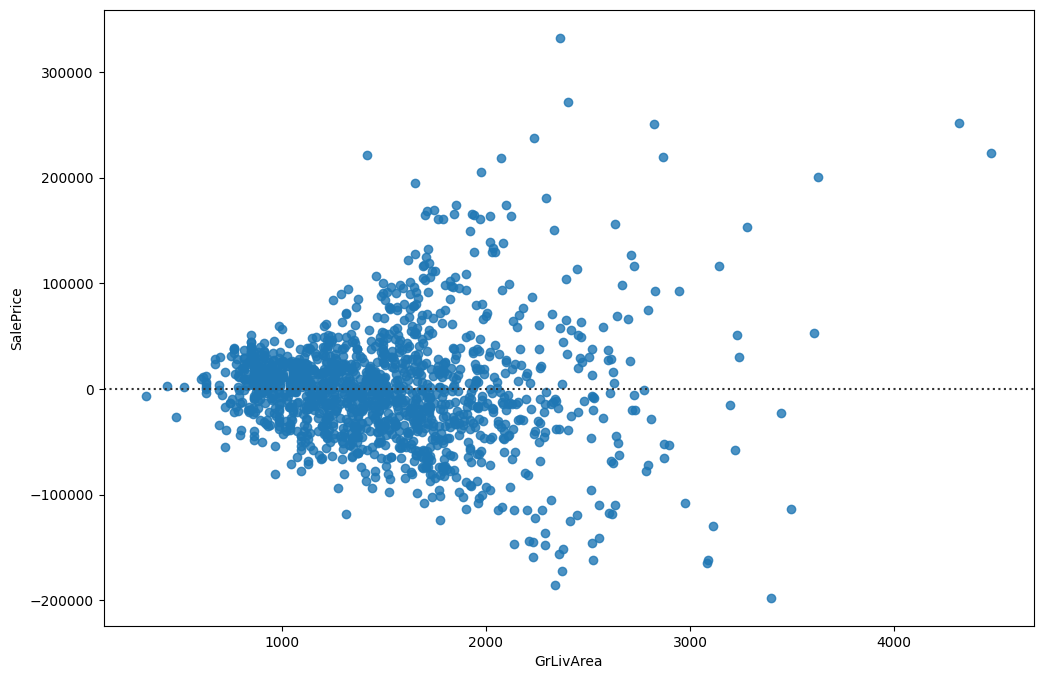

In [23]:
# Creating residual plot for regression analysis
plt.subplots(figsize=(12, 8))
sns.residplot(x=df1['GrLivArea'], y=df1['SalePrice']);

<ipython-input-24-4bd18538cd44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SalePrice"] = np.log1p(df1["SalePrice"])


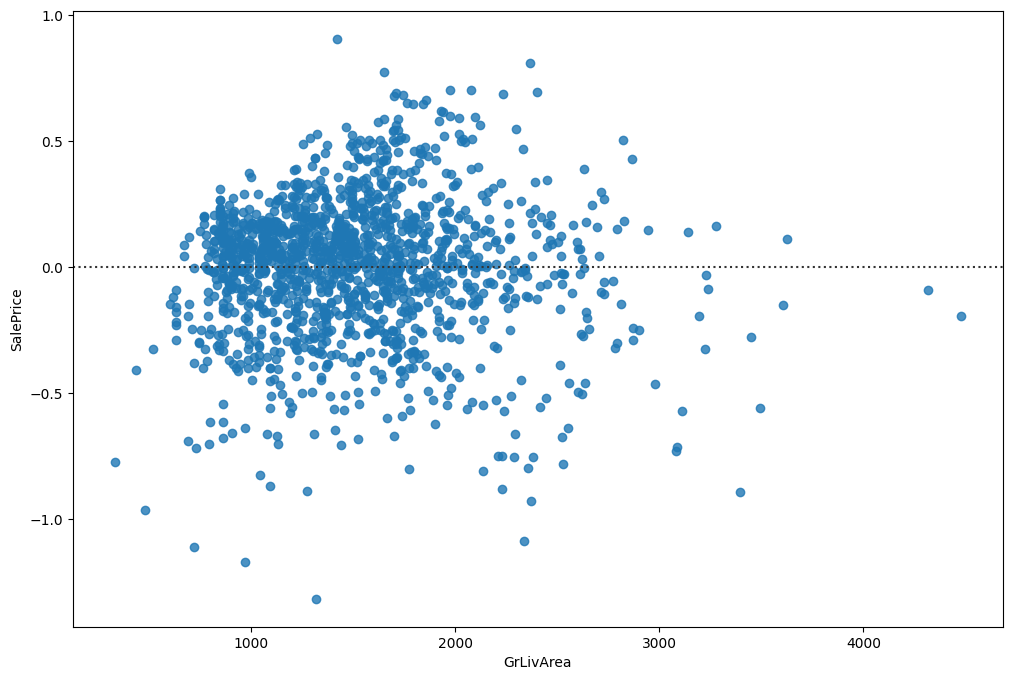

In [24]:
## trainsforming target variable using numpy.log1p,
df1["SalePrice"] = np.log1p(df1["SalePrice"])

# Creating residual plot for regression analysis
plt.subplots(figsize=(12, 8))
sns.residplot(x=df1['GrLivArea'], y=df1['SalePrice']);

In [25]:
#skewness and kurtosis
print("Skewness: " + str(df1['SalePrice'].skew()))
print("Kurtosis: " + str(df1['SalePrice'].kurt()))

Skewness: 0.12157976050304879
Kurtosis: 0.8047507917418972


In [26]:
## Saving the target values in "y_train".
y_train = df1['SalePrice'].reset_index(drop=True)

## Dropping the "Id" from train and test set.

df1.drop(columns=['Id'],axis=1, inplace=True)

df1.drop(columns=['SalePrice'], axis=1, inplace=True)

<ipython-input-26-31c2d764425d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Id'],axis=1, inplace=True)
<ipython-input-26-31c2d764425d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['SalePrice'], axis=1, inplace=True)


In [27]:
# Missing values are updated as None from the categorical features
missing_values = ["Alley",
                   "PoolQC",
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_values:
    df1[i] = df1[i].fillna('None')

<ipython-input-27-bb02fff5a3c3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = df1[i].fillna('None')


In [28]:
# Missing values are updated to 0 as there is a reason for Null
missing_value2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_value2:
    df1[i] = df1[i].fillna(0)

# Calculating the median value of each neighborhood and thereby replacing the na values with the median values in the LotFrontage, we do this for better prediction and accuracy
df1['LotFrontage'] = df1.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

<ipython-input-28-678b1cbfcf66>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = df1[i].fillna(0)
<ipython-input-28-678b1cbfcf66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LotFrontage'] = df1.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))


In [29]:
# Updating NA values in columns Functional, Utilities, KitchenQual and Electrical to Categories based on the dataset description
# Updating NA values in columns Exterior1st, Exterior2nd and SaleType to mode value from the previous step
df1['Functional'] = df1['Functional'].fillna('Typ')
df1['Utilities'] = df1['Utilities'].fillna('AllPub')
df1['Exterior1st'] = df1['Exterior1st'].fillna(df1['Exterior1st'].mode()[0])
df1['Exterior2nd'] = df1['Exterior2nd'].fillna(df1['Exterior2nd'].mode()[0])
df1['KitchenQual'] = df1['KitchenQual'].fillna("TA")
df1['SaleType'] = df1['SaleType'].fillna(df1['SaleType'].mode()[0])
df1['Electrical'] = df1['Electrical'].fillna("SBrkr")

<ipython-input-29-52c3b71a0ade>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Functional'] = df1['Functional'].fillna('Typ')
<ipython-input-29-52c3b71a0ade>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Utilities'] = df1['Utilities'].fillna('AllPub')
<ipython-input-29-52c3b71a0ade>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [30]:
# Converting MSSubClass from int to type string as it represents category
# Grouping MSZoning with MSSubclass and for each group, it fills missing values in the 'MSZoning' column with the mode (most frequent value) of that specific group.
# Converting year sold and month sold to strings as we donot perform any numerical operations on this data and these act as labels
df1['MSSubClass'] = df1['MSSubClass'].astype(str)
df1['MSZoning'] = df1.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df1['YrSold'] = df1['YrSold'].astype(str)
df1['MoSold'] = df1['MoSold'].astype(str)


<ipython-input-30-881e21048b4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MSSubClass'] = df1['MSSubClass'].astype(str)
<ipython-input-30-881e21048b4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MSZoning'] = df1.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
<ipython-input-30-881e21048b4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2916 non-null   object 
 1   MSZoning       2916 non-null   object 
 2   LotFrontage    2916 non-null   float64
 3   LotArea        2916 non-null   int64  
 4   Street         2916 non-null   object 
 5   Alley          2916 non-null   object 
 6   LotShape       2916 non-null   object 
 7   LandContour    2916 non-null   object 
 8   Utilities      2916 non-null   object 
 9   LotConfig      2916 non-null   object 
 10  LandSlope      2916 non-null   object 
 11  Neighborhood   2916 non-null   object 
 12  Condition1     2916 non-null   object 
 13  Condition2     2916 non-null   object 
 14  BldgType       2916 non-null   object 
 15  HouseStyle     2916 non-null   object 
 16  OverallQual    2916 non-null   int64  
 17  OverallCond    2916 non-null   int64  
 18  YearBuil

In [32]:
#Checking the skewness and kurtosis of the numerical variables
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

numeric_features = df1.dtypes[df1.dtypes != "object"].index
Total_skew = df1[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = Total_skew[abs(Total_skew) > 0.5]
Total_skew_features = high_skew.index


Total_skew

MiscVal          22.179467
PoolArea         17.685603
LotArea          13.187716
LowQualFinSF     12.082427
3SsnPorch        11.370087
KitchenAbvGr      4.299698
BsmtFinSF2        4.143683
EnclosedPorch     4.001570
ScreenPorch       3.944305
BsmtHalfBath      3.943693
MasVnrArea        2.594532
OpenPorchSF       2.495215
WoodDeckSF        1.844585
LotFrontage       1.058664
GrLivArea         0.971914
1stFlrSF          0.951859
BsmtUnfSF         0.920849
2ndFlrSF          0.861039
BsmtFinSF1        0.838067
Fireplaces        0.725620
TotRmsAbvGrd      0.709519
HalfBath          0.697717
BsmtFullBath      0.623366
OverallCond       0.568814
TotalBsmtSF       0.413007
BedroomAbvGr      0.326012
GarageArea        0.210193
OverallQual       0.185768
FullBath          0.166179
GarageCars       -0.219348
YearRemodAdd     -0.449733
YearBuilt        -0.598909
GarageYrBlt      -3.903846
dtype: float64

In [33]:
# Performing this function to reduce the skewness of the features with features with skewness greater than 0.5
 ## Import necessary modules
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Getting all the data that are not of "object" type.
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    numeric_features = df1.dtypes[df1.dtypes != "object"].index
    Total_skew = df1[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = Total_skew[abs(Total_skew) > 0.5]
    Total_skew_features = high_skew.index

    for i in Total_skew_features:

        try:
          df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))
        except:
          pass

fixing_skewness(df1)

<ipython-input-33-8eb55dd834a4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [34]:
numeric_features = df1.dtypes[df1.dtypes != "object"].index
Total_skew = df1[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

Total_skew

PoolArea         15.592364
LotArea          13.187716
3SsnPorch         8.860495
LowQualFinSF      8.491121
MiscVal           5.264699
BsmtHalfBath      3.791642
KitchenAbvGr      3.777556
ScreenPorch       3.151991
BsmtFinSF2        2.577759
EnclosedPorch     2.148620
MasVnrArea        0.977715
2ndFlrSF          0.895075
WoodDeckSF        0.785904
HalfBath          0.733553
GarageYrBlt       0.702078
OpenPorchSF       0.620723
BsmtFullBath      0.617437
Fireplaces        0.553273
TotalBsmtSF       0.413007
OverallCond       0.382185
BsmtFinSF1        0.358571
BedroomAbvGr      0.326012
GarageArea        0.210193
OverallQual       0.185768
FullBath          0.166179
BsmtUnfSF         0.054384
LotFrontage       0.050448
TotRmsAbvGrd      0.046676
GrLivArea         0.009991
1stFlrSF         -0.000980
GarageCars       -0.219348
YearBuilt        -0.253988
YearRemodAdd     -0.449733
dtype: float64

In [35]:
# From the Initial analysis dropping columns that has more than 60 percent NA values in the columns
df1 = df1.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

In [36]:
# Assuming df1 is your DataFrame
df1_shape = df1.shape

# Now you can access the number of rows and columns using the returned tuple
num_rows = df1_shape[0]
num_columns = df1_shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2916
Number of columns: 75


In [37]:
## Creating dummy variable inorder to convert categorical fetures into dummy variables
df2 = pd.get_dummies(df1).reset_index(drop=True)
df2.shape

(2916, 314)

In [38]:
# This is to remove duplicate columns from the df2 dataframe
df2 = df2.loc[:,~df2.columns.duplicated()]

In [39]:
# Storing df2 dataframe into Dataset1 CSV file
df2.to_csv('Dataset1.csv',index=False)

%pwd
df2.to_csv('Dataset1.csv', index=False)

In [40]:
# Storing df1 dataframe into Dataset2 CSV file
df1.to_csv('Dataset2.csv',index=False)

%pwd
df1.to_csv('Dataset2.csv', index=False)

In [41]:
# Assuming 'y_train' is your Series (single column) and 'SalePrice' is the column
y_train = y_train.dropna()

# Or, if you want to create a new Series without modifying the original one
y_train_without_missing = y_train.dropna()


(y_train.shape)

(1458,)

In [42]:
# Creating X_train, X_test sets in comparision to y_train where the dependent variable column is stored
X_train = df2.iloc[:len(y_train), :]

#X_test = df2.iloc[len(y_train):, :]

print(X_train.shape)

#print(X_test.shape)

print(y_train.shape)

(1458, 314)
(1458,)


In [43]:
# From this code I am checking for the features if the percentage of the most frequent value is greater than 99.94%, the feature is considered overfitted
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X_train)

overfitted_features


['MSSubClass_150']

In [44]:
# Using this code below dropping overfitted features from the X_train and X_test
X_train = X_train.drop(overfitted_features, axis=1)
#X_test = X_test.drop(overfitted_features, axis=1)

print(X_train.shape)

#print(X_test.shape)

#print(type(X_test))

(1458, 313)


In [45]:
# performing feature scaling using the StandardScaler from scikit-learn. Feature scaling is a preprocessing step in machine learning that standardizes or normalizes the range of independent variables or features of the dataset.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [46]:
# Storing X_train in X and y_train in y and using train_test_split splitting the train and test data
X = X_train
y = y_train

from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [47]:
# Checking the shape of X_train, X_test, y_train and y_test
X_train.shape, X_test.shape


((976, 313), (482, 313))

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((976, 313), (976,), (482, 313), (482,))

In [49]:
# Creating an instance of the XGBoost regressor. This regression is commonly used for regression tasks to predict continous target variable
import xgboost
classifier=xgboost.XGBRegressor()

In [50]:
import xgboost
regressor=xgboost.XGBRegressor()

In [51]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred=regressor.predict(X_test)

In [53]:
# Checking the rmse value on the y_pred and y_test
from sklearn.metrics import mean_squared_error

# Assuming y_actual and y_pred are NumPy arrays or lists
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.14523231275383722


In [54]:
# Defining hyper parameter options gbtree represents tree models, gblinear represents linear models
booster=['gbtree','gblinear']
# Base score is for the gloabl mean of the target variable
base_score=[0.25,0.5,0.75,1]

In [55]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,  # Number of boosting rounds
    'max_depth':max_depth,         # Maximum depth of a tree
    'learning_rate':learning_rate, # Step size shrinkage to prevent overfitting
    'min_child_weight':min_child_weight, # Minimum sum of instance weight needed in a child
    'booster':booster,             # Type of boosting model (tree or linear)
    'base_score':base_score        # Initial prediction score for all instances
    }

In [56]:
# Set up the random search with 4-fold cross validation

# Import the RandomizedSearchCV class from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=regressor,                    # The base regressor (XGBoost in this case)
    param_distributions=hyperparameter_grid, # The grid of hyperparameters to search
    cv=5,                                   # Number of cross-validation folds
    n_iter=50,                              # Number of iterations for random search
    scoring='neg_mean_absolute_error',      # Scoring metric to optimize (negative mean absolute error)
    n_jobs=4,                               # Number of parallel jobs to run (-1 uses all available cores)
    verbose=5,                              # Verbosity level (higher values provide more details)
    return_train_score=True,                # Include training scores in the result
    random_state=42                          # Random seed for reproducibility
)

In [57]:
# Fit the model to the training data with hyperparameter optimization
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [58]:
# Access the best estimator (best set of hyperparameters) found during the search
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# Access the best estimator (best set of hyperparameters) found during the search
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
# This is not necessary to initilaze again but I am doing it if there will be any changes
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [62]:
# Not required
import pickle
filename = 'final_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [63]:
# Checking the output data
X_test.shape
print(X_test[:5])
print(type(X_test))

[[ 1.35327189  2.45439463 -0.79509203 ... -0.11793306  0.46586305
  -0.3035372 ]
 [ 0.63179811 -0.00405211 -0.06829317 ... -0.11793306  0.46586305
  -0.3035372 ]
 [ 0.28175265 -0.19439657 -2.24868976 ... -0.11793306  0.46586305
  -0.3035372 ]
 [ 0.03951748 -0.06695913 -0.79509203 ... -0.11793306 -2.14655359
  -0.3035372 ]
 [ 2.66328851  0.90485279  0.65850569 ... -0.11793306 -2.14655359
   3.29448912]]
<class 'numpy.ndarray'>


In [64]:
# Checking for null values
print(pd.isnull(X_test).sum())

0


In [65]:
# Use the trained XGBoost regressor to predict the target variable (y) for the test set (X_test)
y_pred=regressor.predict(X_test)

In [66]:
y_pred

array([11.807407 , 12.010411 , 11.320405 , 11.789979 , 12.568461 ,
       11.874667 , 12.098949 , 11.754544 , 11.813305 , 11.79463  ,
       12.218008 , 11.733823 , 11.789683 , 11.871301 , 11.376905 ,
       12.285009 , 12.343877 , 11.532502 , 12.148637 , 12.953124 ,
       12.537719 , 11.678702 , 11.633173 , 11.538098 , 11.710793 ,
       12.154446 , 12.198944 , 11.741055 , 11.761403 , 13.017879 ,
       11.995257 , 12.316763 , 12.010857 , 12.267446 , 11.546515 ,
       11.648237 , 12.24329  , 12.540573 , 11.559744 , 11.17228  ,
       11.749018 , 12.15562  , 11.803198 , 11.835456 , 12.0914   ,
       12.046002 , 12.635384 , 12.608515 , 13.104761 , 12.45239  ,
       12.397196 , 11.624906 , 12.043621 , 11.839656 , 12.853819 ,
       12.453873 , 12.625614 , 11.681098 , 12.166438 , 11.653761 ,
       11.935255 , 11.750957 , 11.576147 , 12.631396 , 11.68364  ,
       12.748514 , 12.535518 , 12.561524 , 11.909732 , 11.789155 ,
       11.824015 , 12.329731 , 11.444622 , 11.988476 , 12.8476

In [67]:
# Checking the mean squared error on the y_pred in comparision to y_test
from sklearn.metrics import mean_squared_error

# Assuming y_test is the true target values for your test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.014562086927363162


In [68]:
# Checking the rmse value on the y_pred and y_test
from sklearn.metrics import mean_squared_error

# Assuming y_actual and y_pred are NumPy arrays or lists
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.12067347234319216


In [69]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Scale the features for Ridge regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) based on your needs
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression RMSE: {rmse_ridge}")


Ridge Regression RMSE: 0.1374030812118707


In [70]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Scale the features for Lasso regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) based on your needs
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression RMSE: {rmse_lasso}")


Lasso Regression RMSE: 0.40579964906810284


In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Scale the features for Elastic Net regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Elastic Net regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) based on your needs
l1_ratio = 0.5  # You can adjust the mix of L1 and L2 regularization
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_elasticnet = elasticnet_model.predict(X_test_scaled)

# Calculate RMSE
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))

print(f"Elastic Net Regression RMSE: {rmse_elasticnet}")


Elastic Net Regression RMSE: 0.40579964906810284


In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Scale the features for SGD regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SGD regression model
sgd_model = SGDRegressor()
sgd_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate RMSE
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

print(f"SGD Regression RMSE: {rmse_sgd}")


SGD Regression RMSE: 17.625731736564454


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Create and fit the Decision Tree regression model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate RMSE
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))

print(f"Decision Tree Regression RMSE: {rmse_decision_tree}")


Decision Tree Regression RMSE: 0.21476515315323932


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Create and fit the Random Forest regression model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate RMSE
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

print(f"Random Forest Regression RMSE: {rmse_random_forest}")


Random Forest Regression RMSE: 0.13795923004859073


In [75]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are your training and test data
# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVR model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate RMSE
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"SVR RMSE: {rmse_svr}")


SVR RMSE: 0.1444252914485047


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:00] WARNING: /workspace/src/objective/regress

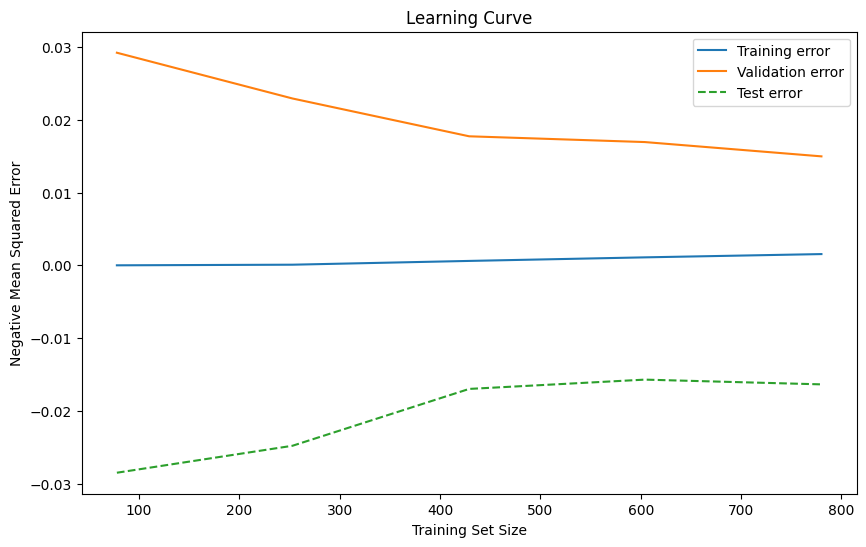

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, scoring_metric='neg_mean_squared_error', train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve for an estimator.

    Parameters:
    - estimator: The machine learning model (regressor) you're using.
    - X_train: Training features.
    - y_train: Training target variable.
    - X_test: Test features.
    - y_test: Test target variable.
    - scoring_metric: The metric used for scoring. Default is 'neg_mean_squared_error'.
    - train_sizes: Array of training set sizes.

    Returns:
    - Plots the learning curve.
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X_train, y_train, cv=5, train_sizes=train_sizes, scoring=scoring_metric
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    # Evaluate on the test set to get predictions
    test_scores = [mean_squared_error(y_test, estimator.fit(X_train[:n], y_train[:n]).predict(X_test)) for n in train_sizes]
    test_scores_mean = -np.array(test_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.plot(train_sizes, test_scores_mean, label='Test error', linestyle='dashed')

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend()
    plt.show()

# Assuming model named 'model' and your data is in 'X_train', 'y_train', 'X_test', and 'y_test'
# Adjust the parameters based on your specific needs
plot_learning_curve(regressor, X_train, y_train, X_test, y_test)


In [77]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# We have X_train, X_test, y_train, and y_test

# XGBoost with L1 (Lasso) regularization
xgb_lasso = xgb.XGBRegressor(objective='reg:squarederror', alpha=1)  # Adjust alpha as needed
xgb_lasso.fit(X_train, y_train)
y_pred_lasso = xgb_lasso.predict(X_test)

# XGBoost with L2 (Ridge) regularization
xgb_ridge = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1)  # Adjust reg_lambda as needed
xgb_ridge.fit(X_train, y_train)
y_pred_ridge = xgb_ridge.predict(X_test)

# Calculate RMSE for both models
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f"RMSE for Lasso: {rmse_lasso}")
print(f"RMSE for Ridge: {rmse_ridge}")


RMSE for Lasso: 0.14236517062993354
RMSE for Ridge: 0.14523231275383722


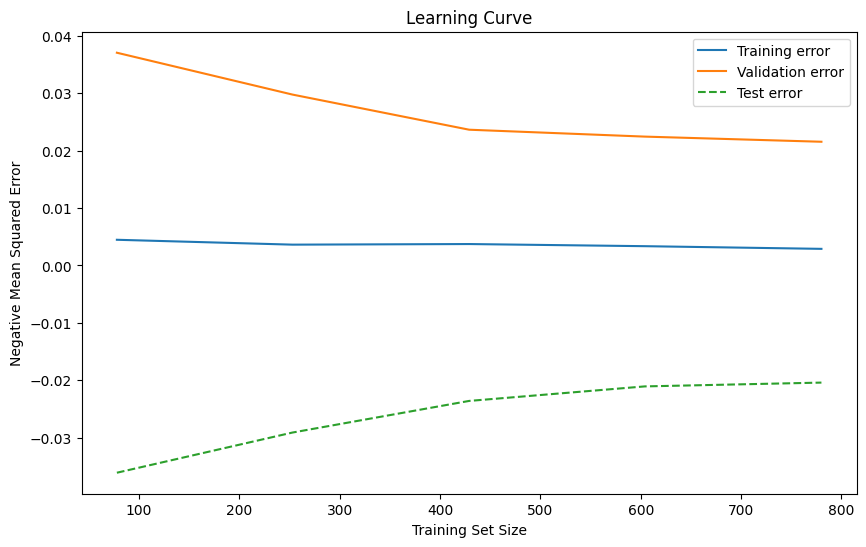

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, scoring_metric='neg_mean_squared_error', train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve for an estimator.

    Parameters:
    - estimator: The machine learning model (regressor) you're using.
    - X_train: Training features.
    - y_train: Training target variable.
    - X_test: Test features.
    - y_test: Test target variable.
    - scoring_metric: The metric used for scoring. Default is 'neg_mean_squared_error'.
    - train_sizes: Array of training set sizes.

    Returns:
    - Plots the learning curve.
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X_train, y_train, cv=5, train_sizes=train_sizes, scoring=scoring_metric
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    # Evaluate on the test set to get predictions
    test_scores = [mean_squared_error(y_test, estimator.fit(X_train[:n], y_train[:n]).predict(X_test)) for n in train_sizes]
    test_scores_mean = -np.array(test_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.plot(train_sizes, test_scores_mean, label='Test error', linestyle='dashed')

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend()
    plt.show()

# Assuming model named 'model' and your data is in 'X_train', 'y_train', 'X_test', and 'y_test'
# Adjust the parameters based on your specific needs
plot_learning_curve(random_forest_model, X_train, y_train, X_test, y_test)